# Install Ludwig toolbox

In [1]:
!pip install Ludwig
!pip install tensorflow-gpu==1.14.0

     |████████████████████████████████| 174kB 6.3MB/s 
     |████████████████████████████████| 109.2MB 113kB/s 
     |████████████████████████████████| 491kB 38.8MB/s 
     |████████████████████████████████| 3.2MB 37.5MB/s 
  Created wheel for Ludwig: filename=ludwig-0.2.1-cp36-none-any.whl size=226575 sha256=6a7c1aeb6b9b6d89ef43c4b72eb0d02651575bbace3a1b27311750a86856d547
  Stored in directory: /root/.cache/pip/wheels/fc/5d/fd/3796fa772d73a3c0888e78346f28f54100e5d5ef5562890426
Successfully built Ludwig
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0
     |████████████████████████████████| 377.0MB 46kB/s 


# Download and unzip datasets and yaml files

In [2]:
%cd /content
!wget https://github.com/tomasrasymas/ludwig-toolbox-meetup/raw/master/data.zip
!unzip data.zip
!mkdir results

/content
--2019-11-04 11:54:41--  https://github.com/tomasrasymas/ludwig-toolbox-meetup/raw/master/data.zip
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tomasrasymas/ludwig-toolbox-meetup/master/data.zip [following]
--2019-11-04 11:54:41--  https://raw.githubusercontent.com/tomasrasymas/ludwig-toolbox-meetup/master/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34615567 (33M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  33.01M  --.-KB/s    in 0.1s    

2019-11-04 11:54:42 (240 MB/s) - ‘data.zip’ saved [34615567/34615567]

Archive:  data.zip
   

# Helper functions

In [0]:
%matplotlib inline

import pandas
from IPython.display import Image, display

def csv_head(f, n=10):
  df = pandas.read_csv(f)
  return df.head(n=n)

def display_image(f):
  display(Image(f))

# Iris species prediction

Source: https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv

In [4]:
csv_head('/content/data/datasets/iris.csv', n=100)

sepal_length  sepal_width  petal_length  petal_width     species
0            4.7          3.2           1.3          0.2      setosa
1            4.6          3.1           1.5          0.2      setosa
2            5.0          3.6           1.4          0.2      setosa
3            5.4          3.9           1.7          0.4      setosa
4            4.6          3.4           1.4          0.3      setosa
..           ...          ...           ...          ...         ...
95           5.7          2.8           4.1          1.3  versicolor
96           6.3          3.3           6.0          2.5   virginica
97           5.8          2.7           5.1          1.9   virginica
98           7.1          3.0           5.9          2.1   virginica
99           6.3          2.9           5.6          1.8   virginica

[100 rows x 5 columns]

### Model definition

In [5]:
!cat '/content/data/yamls/iris.yaml'

training:
  epochs: 200

preprocessing:
  stratify: species

input_features:
  -
    name: sepal_length
    type: numerical
  -
    name: sepal_width
    type: numerical
  -
    name: petal_length
    type: numerical
  -
    name: petal_width
    type: numerical

output_features:
  -
    name: species
    type: category
    num_fc_layers: 2

## Performing the experiment

In [6]:
!ludwig experiment \
--data_csv data/datasets/iris.csv \
--model_definition_file data/yamls/iris.yaml \
--output_directory results/iris \
--experiment_name iris \
--model_name iris_model

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

### Visualizing training statistics

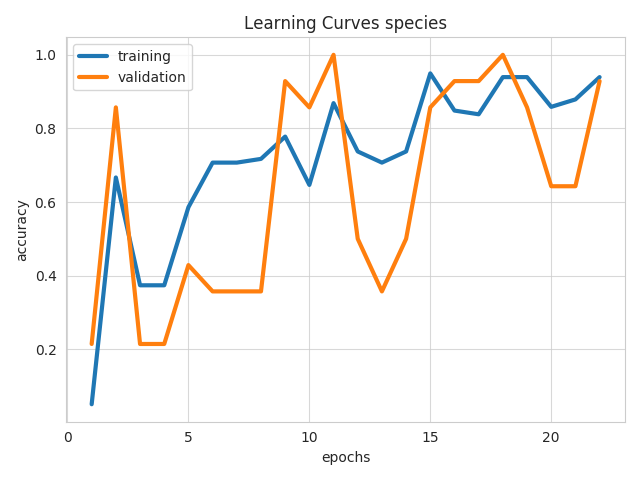

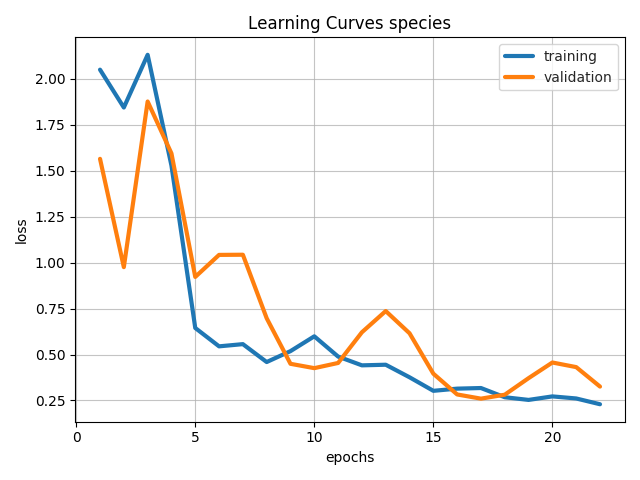

In [7]:
!ludwig visualize \
--visualization learning_curves \
--training_statistics /content/results/iris/iris_iris_model/training_statistics.json \
--output_directory results/iris/visualizations \
--file_format png

display_image('/content/results/iris/visualizations/learning_curves_species_accuracy.png')
display_image('/content/results/iris/visualizations/learning_curves_species_loss.png')

## Visualizing testing statistics

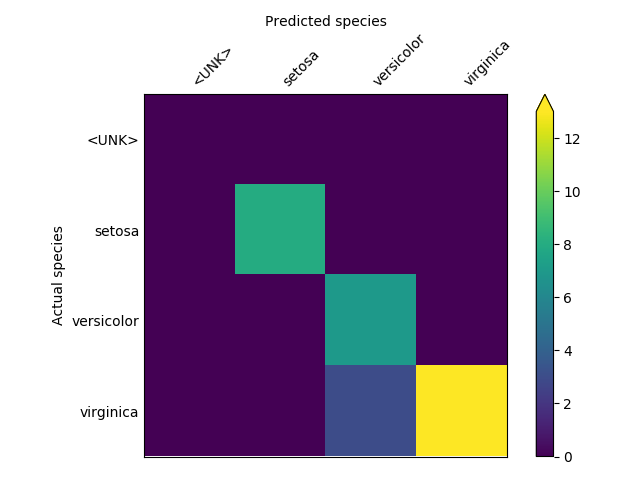

In [8]:
!ludwig visualize \
--visualization confusion_matrix \
--test_statistics results/iris/iris_iris_model/test_statistics.json \
--ground_truth_metadata data/datasets/iris.json \
--output_directory results/iris/visualizations \
--file_format png

display_image('/content/results/iris/visualizations/confusion_matrix__species_top4.png')

## Predict

In [9]:
!ludwig predict \
--data_csv data/datasets/iris_predict.csv \
--model_path results/iris/iris_iris_model/model/ \
--output_directory results/iris/predict

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

# Diamond price prediction

Source:
https://www.kaggle.com/shivam2503/diamonds

In [10]:
csv_head('/content/data/datasets/diamonds.csv', n=100)

Unnamed: 0  carat        cut color clarity  ...  table  price     x     y     z
0            1   0.23      Ideal     E     SI2  ...   55.0    326  3.95  3.98  2.43
1            2   0.21    Premium     E     SI1  ...   61.0    326  3.89  3.84  2.31
2            3   0.23       Good     E     VS1  ...   65.0    327  4.05  4.07  2.31
3            4   0.29    Premium     I     VS2  ...   58.0    334  4.20  4.23  2.63
4            5   0.31       Good     J     SI2  ...   58.0    335  4.34  4.35  2.75
..         ...    ...        ...   ...     ...  ...    ...    ...   ...   ...   ...
95          96   0.70       Good     E     VS2  ...   58.0   2759  5.85  5.90  3.38
96          97   0.70       Good     F     VS1  ...   62.0   2759  5.71  5.76  3.40
97          98   0.96       Fair     F     SI2  ...   62.0   2759  6.27  5.95  4.07
98          99   0.73  Very Good     E     SI1  ...   59.0   2760  5.77  5.78  3.56
99         100   0.80    Premium     H     SI1  ...   58.0   2760  5.97  5.93  3.66

[100 rows x 11 columns]

### Model definition

In [11]:
!cat '/content/data/yamls/diamonds.yaml'

training:
  epochs: 10
 
input_features:
  -
    name: carat
    type: numerical
  -
    name: cut
    type: category
  -
    name: color
    type: category
  -
    name: clarity
    type: category
  -
    name: depth
    type: numerical
  -
    name: table
    type: numerical
 
output_features:
  -
    name: price
    type: numerical
    num_fc_layers: 10

### Performing the experiment

In [12]:
!ludwig experiment \
--data_csv data/datasets/diamonds.csv \
--model_definition_file data/yamls/diamonds.yaml \
--output_directory results/diamonds \
--experiment_name diamonds \
--model_name diamonds_model

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

## Predict

In [13]:
!ludwig predict \
--data_csv data/datasets/diamonds_predict.csv \
--model_path results/diamonds/diamonds_diamonds_model/model/ \
--output_directory results/diamonds/predict

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

# Tweet sentiment prediction

Source: https://www.kaggle.com/welkin10/airline-sentiment

In [14]:
csv_head('/content/data/datasets/airline_sentiment.csv', n=100)

tweet_id  ...                user_timezone
0   570306133677760513  ...   Eastern Time (US & Canada)
1   570301130888122368  ...   Pacific Time (US & Canada)
2   570301083672813571  ...   Central Time (US & Canada)
3   570301031407624196  ...   Pacific Time (US & Canada)
4   570300817074462722  ...   Pacific Time (US & Canada)
..                 ...  ...                          ...
95  569910981868060673  ...                      Arizona
96  569909224521641984  ...  Mountain Time (US & Canada)
97  569907336485019648  ...                          NaN
98  569896805611089920  ...   Eastern Time (US & Canada)
99  569894449620369408  ...                        Quito

[100 rows x 15 columns]

### Model definition

In [15]:
!cat '/content/data/yamls/airline_sentiment.yaml'

preprocessing:
  lowercase: true
  stratify: airline_sentiment
 
training:
  epochs: 5
 
input_features:
    -
      name: text
      type: text
 
output_features:
    -
      name: airline_sentiment
      type: category

### Performing the experiments

In [16]:
!ludwig experiment \
--data_csv data/datasets/airline_sentiment.csv \
--model_definition_file data/yamls/airline_sentiment.yaml \
--output_directory results/airline_sentiment \
--experiment_name airline_sentiment \
--model_name airline_sentiment_model

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

## Visualizing training statistics

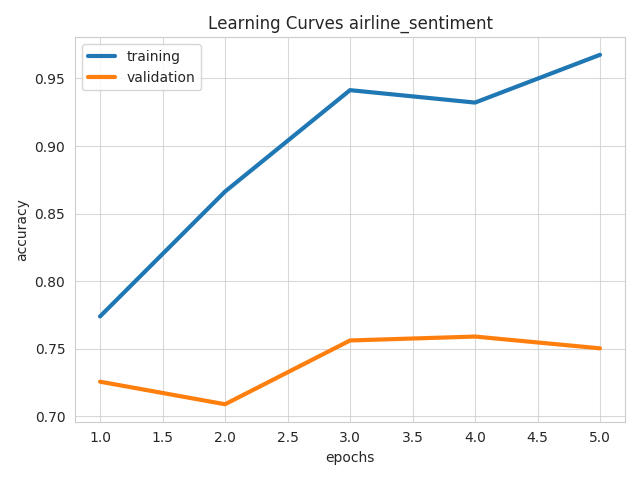

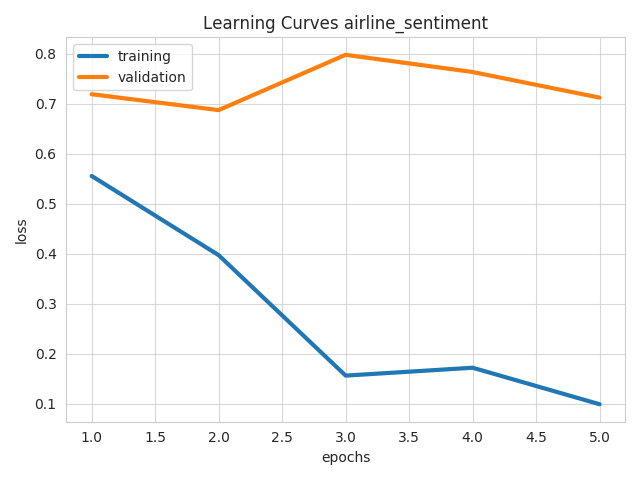

In [17]:
!ludwig visualize \
--visualization learning_curves \
--training_statistics /content/results/airline_sentiment/airline_sentiment_airline_sentiment_model/training_statistics.json \
--output_directory results/airline_sentiment/visualizations \
--file_format png

display_image('/content/results/airline_sentiment/visualizations/learning_curves_airline_sentiment_accuracy.png')
display_image('/content/results/airline_sentiment/visualizations/learning_curves_airline_sentiment_loss.png')

## Visualising testing statistics

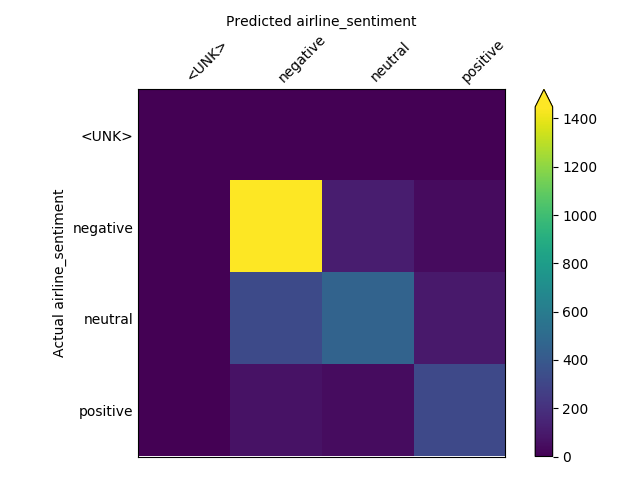

In [18]:
!ludwig visualize \
--visualization confusion_matrix \
--test_statistics results/airline_sentiment/airline_sentiment_airline_sentiment_model/test_statistics.json \
--ground_truth_metadata data/datasets/airline_sentiment.json \
--output_directory results/airline_sentiment/visualizations \
--file_format png

display_image('/content/results/airline_sentiment/visualizations/confusion_matrix__airline_sentiment_top4.png')

## Predict

In [19]:
!ludwig predict \
--data_csv data/datasets/airline_sentiment.csv \
--model_path results/airline_sentiment/airline_sentiment_airline_sentiment_model/model/ \
--output_directory results/airline_sentiment/predict

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

# Digit prediction

Source: https://github.com/myleott/mnist_png

In [20]:
csv_head('/content/data/datasets/mnist/mnist.csv', n=100)

image_path  label
0   training/0/16585.png      0
1   training/0/24537.png      0
2   training/0/25629.png      0
3   training/0/20751.png      0
4   training/0/34730.png      0
..                   ...    ...
95   training/0/1596.png      0
96  training/0/47480.png      0
97  training/0/57693.png      0
98   training/0/5096.png      0
99  training/0/16817.png      0

[100 rows x 2 columns]

### Model definition

In [21]:
!cat '/content/data/yamls/mnist.yaml'

input_features:
  -
    name: image_path
    type: image
 
output_features:
  -
    name: label
    type: category

preprocessing:
  stratify: label
 
training:
  epochs: 5

### Performing the experiment

In [22]:
!ludwig experiment \
--data_csv data/datasets/mnist/mnist.csv \
--model_definition_file data/yamls/mnist.yaml \
--output_directory results/mnist \
--experiment_name mnist \
--model_name mnist_model 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

## Visualizing training statistics

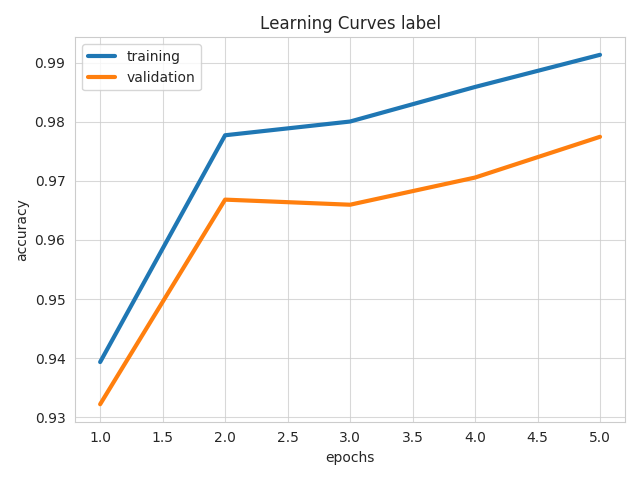

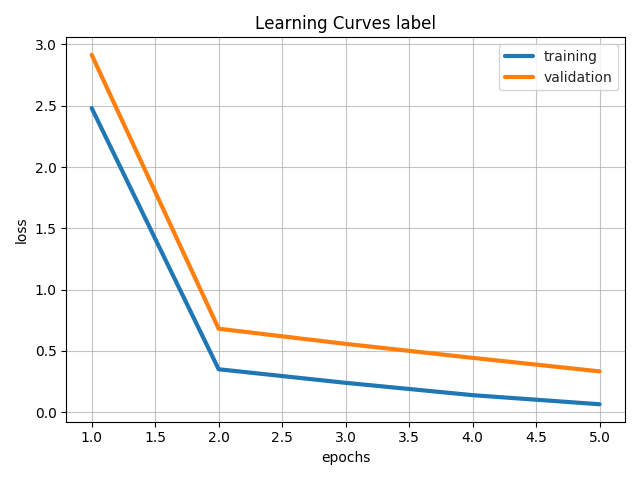

In [23]:
!ludwig visualize \
--visualization learning_curves \
--training_statistics /content/results/mnist/mnist_mnist_model/training_statistics.json \
--output_directory results/mnist/visualizations \
--file_format png

display_image('/content/results/mnist/visualizations/learning_curves_label_accuracy.png')
display_image('/content/results/mnist/visualizations/learning_curves_label_loss.png')



## Visualizing testing statistics

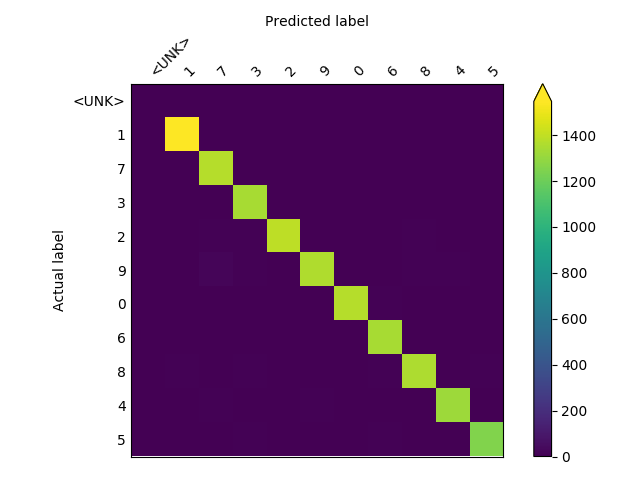

In [24]:
!ludwig visualize \
--visualization confusion_matrix \
--test_statistics results/mnist/mnist_mnist_model/test_statistics.json \
--ground_truth_metadata data/datasets/mnist/mnist.json \
--output_directory results/mnist/visualizations \
--file_format png

display_image('/content/results/mnist/visualizations/confusion_matrix__label_top11.png')

## Predicting

In [25]:
!ludwig predict \
--data_csv data/datasets/mnist/mnist_predict.csv \
--model_path results/mnist/mnist_mnist_model/model/ \
--output_directory results/mnist/predict

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

# Serving model

In [26]:
!ludwig serve \
--model_path results/mnist/mnist_mnist_model/model \
--port 8000 \
--host 0.0.0.0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

```
!curl http://127.0.0.1:8000/predict -X POST -F 'image_path=/content/data/datasets/mnist/testing/0/101.png'
```